<a href="https://colab.research.google.com/github/RezaulKarim-506/research/blob/master/my_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Data/dataset_for_Bangla_as_text.csv',encoding = "utf-16", sep = "\t")

In [7]:
data.head()

,Reviews,Feelings,Polarity
0,জমে উঠেছে গ্রুপ বি এর খেলা।,excitement,positive
1,"এখন খেলা হপ্পে, যে দল হারবে সেই দল বাদ পড়ে যাবে",excitement,neutral
2,সব কয়টা সমান,other,neutral
3,সোজা হিসাব যে হারবে সেই বাদ পরবে,sad,positive
4,হিসাব বরবর,other,neutral


In [8]:
data

,Reviews,Feelings,Polarity
0,জমে উঠেছে গ্রুপ বি এর খেলা।,excitement,positive
1,"এখন খেলা হপ্পে, যে দল হারবে সেই দল বাদ পড়ে যাবে",excitement,neutral
2,সব কয়টা সমান,other,neutral
3,সোজা হিসাব যে হারবে সেই বাদ পরবে,sad,positive
4,হিসাব বরবর,other,neutral
...,...,...,...
4996,জাতীয় দলে এনে রানের ফোয়াড়া বন্ধ করার জন্য কতৃপ...,sad,positive
4997,যেমন বোলার তেমন ব্যাটসম্যান.....,happy,positive
4998,টেস্ট ও ওডিআই এর জন্য ঠিক আছে।,other,neutral
4999,রানের ফোয়ারা শুধু ঘরোয় পরিবেশেই সম্ভব,happy,negative


In [9]:
data.shape

(5001, 3)

In [10]:
print("Total reviews : ",len(data),
"\nTotal Positive reviews : ",len(data[data.Polarity == 'positive']),
"\nTotal Negative reviews : ",len(data[data.Polarity == 'negative']),
"\nTotal Neutral reviews : ",len(data[data.Polarity == 'neutral']),
)

Total reviews :  5001 
Total Positive reviews :  2617 
Total Negative reviews :  1070 
Total Neutral reviews :  1310


In [11]:
print("Total reviews : ",len(data),
"\nTotal number of Excitement from reviews : ",len(data[data.Feelings == 'excitement']),
"\nTotal number of Sad from reviews : ",len(data[data.Feelings == 'sad']),
"\nTotal number of Happy from reviews : ",len(data[data.Feelings == 'happy']),
"\nTotal number of Disgust from reviews : ",len(data[data.Feelings == 'disgust']),
"\nTotal number of Surprise from reviews : ",len(data[data.Feelings == 'surprise']),
"\nTotal number of Fear from reviews : ",len(data[data.Feelings == 'fear']),
"\nTotal number of Other from reviews : ",len(data[data.Feelings == 'other']),
)

Total reviews :  5001 
Total number of Excitement from reviews :  303 
Total number of Sad from reviews :  901 
Total number of Happy from reviews :  1569 
Total number of Disgust from reviews :  259 
Total number of Surprise from reviews :  352 
Total number of Fear from reviews :  13 
Total number of Other from reviews :  1354


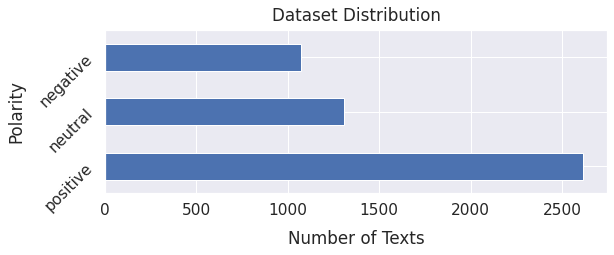

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.4)
data['Polarity'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Texts", labelpad=12)
plt.ylabel("Polarity", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

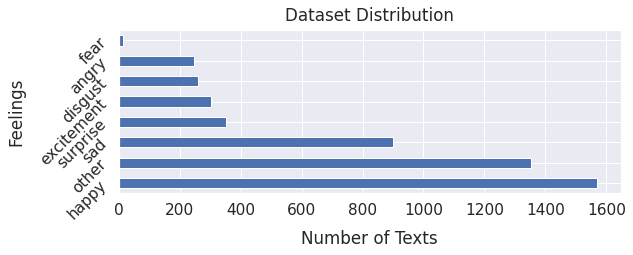

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.4)
data['Feelings'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Texts", labelpad=12)
plt.ylabel("Feelings", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

Data Cleaning

In [23]:
import re,json,nltk
def process_comments(Comment): 
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment

In [26]:
# Apply the function into the dataframe
data['cleaned'] = data['Reviews'].apply(process_comments)  

# print some cleaned reviews from the dataset
sample_data = [10,100,25,854,966,1500,1589,1700,2000,2500,4000,4500]
for i in sample_data:
     print('Original:\n',data.Reviews[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Polarity[i],'\n','Feelings : ',data.Feelings[i],'\n')

Original:
 ভাগ্যিস টি-২০ নাইঃ- সোহান 
Cleaned:
 ভাগ্যিস টি ২০ নাইঃ  সোহান 
 Sentiment:--  negative 
 Feelings :  angry 

Original:
 এবারও বরিশালের হয়ে বিপিএল মাতাবেন সাকিব, গেইল 
Cleaned:
 এবারও বরিশালের হয়ে বিপিএল মাতাবেন সাকিব  গেইল 
 Sentiment:--  positive 
 Feelings :  surprise 

Original:
 আাসুক এইবার ভারত মিরপুর পিচ কি ও কত পকার তা বুজাইয়া দিবো। 
Cleaned:
 আাসুক এইবার ভারত মিরপুর পিচ কি ও কত পকার তা বুজাইয়া দিবো  
 Sentiment:--  positive 
 Feelings :  happy 

Original:
 যানজট vhai 
Cleaned:
 যানজট      
 Sentiment:--  neutral 
 Feelings :  other 

Original:
 এটা ডেথ গ্রুপ! 
Cleaned:
 এটা ডেথ গ্রুপ  
 Sentiment:--  neutral 
 Feelings :  sad 

Original:
 সে হিরো যখন ম্যাচ জিতে কোন লাভ হয় না... দলের যখনই প্রয়োজন হয় তখনই সে শূন্যে আউট হয়.... প্রতিটি গুরুত্বপূর্ণ ম্যাচে 
Cleaned:
 সে হিরো যখন ম্যাচ জিতে কোন লাভ হয় না    দলের যখনই প্রয়োজন হয় তখনই সে শূন্যে আউট হয়     প্রতিটি গুরুত্বপূর্ণ ম্যাচে 
 Sentiment:--  positive 
 Feelings :  happy 

Original:
 কে তার সাথে ঝামেলা করেছে? 

Removing Low Length Data

In [27]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>1]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 63 Small Reviews 
Total Reviews: 4938


Daraset Summary

In [28]:
import numpy as np
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Polarity.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Polarity==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Polarity==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Polarity==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  positive
Number of Documents:2582
Number of Words:25594
Number of Unique Words:5408
Most Frequent Words:

জন্য	285
বাংলাদেশ	261
না	252
ভালো	249
ক্রিকেট	191
ভাই	184
এবং	159
অনেক	156
করে	155
এই	152

Class Name :  neutral
Number of Documents:1291
Number of Words:12565
Number of Unique Words:4320
Most Frequent Words:

না	230
করে	117
আর	102
কি	94
আপনার	81
কে	79
আপনি	79
এই	71
হবে	71
থেকে	68

Class Name :  negative
Number of Documents:1065
Number of Words:10186
Number of Unique Words:3358
Most Frequent Words:

না	194
শান্ত	111
আর	100
কি	79
করে	79
বাংলাদেশ	77
এই	71
সব	60
কে	59
দলে	57
Total Number of Unique Words:8873


Dataset Summary Visualization

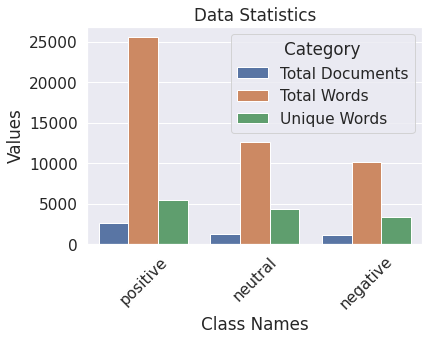

In [29]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

Dataset Summary for Feelings

In [31]:
import numpy as np
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Feelings.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Feelings==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Feelings==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Feelings==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  happy
Number of Documents:1538
Number of Words:14114
Number of Unique Words:3577
Most Frequent Words:

জন্য	220
ভালো	192
বাংলাদেশ	173
ভাই	118
ক্রিকেট	108
অনেক	104
এবং	103
না	102
আপনার	96
শুভকামনা	93

Class Name :  other
Number of Documents:1335
Number of Words:13237
Number of Unique Words:4416
Most Frequent Words:

না	240
করে	130
আর	106
কি	98
কে	91
আপনার	85
হবে	83
এই	79
আপনি	79
ভালো	71

Class Name :  sad
Number of Documents:898
Number of Words:9764
Number of Unique Words:3073
Most Frequent Words:

না	211
আর	89
এই	78
করে	77
বাংলাদেশ	75
জন্য	71
ভালো	70
নাই	60
ক্রিকেট	60
থেকে	52

Class Name :  surprise
Number of Documents:350
Number of Words:2949
Number of Unique Words:1407
Most Frequent Words:

বাংলাদেশ	24
হবে	23
শান্ত	23
আমি	22
নান্নু	21
দল	19
ও	18
না	18
থেকে	16
করে	16

Class Name :  excitement
Number of Documents:303
Number of Words:2839
Number of Unique Words:1328
Most Frequent Words:

বাংলাদেশ	49
ক্রিকেট	28
আমি	23
ম্যাচ	22
হবে	22
এবং	20
না	19
বাংলাদেশের	18
আপনার	18
ও	1

Dataset Summary Visualization for Feelings

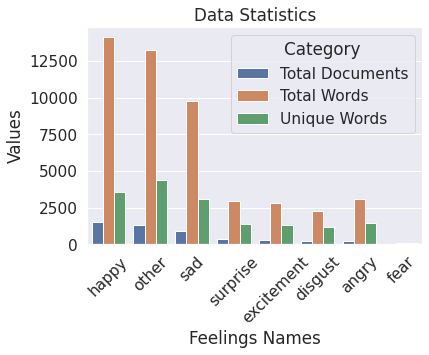

In [34]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Feelings Names':class_names})
df = pd.melt(data_matrix, id_vars="Feelings Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Feelings Names', y='Values' ,hue='Category')
ax.set_xlabel('Feelings Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

Comment Length Distribution

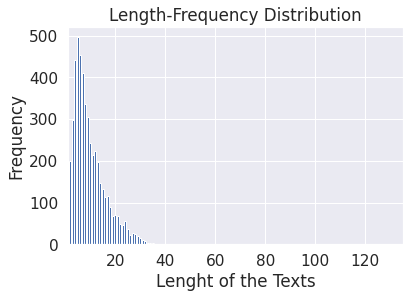

Maximum Length of a review: 39
Minimum Length of a review: 2
Average Length of a reviews: 10.0


In [35]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

Take only Positive and Negative Class for Model Building